# Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%run gradient_descent
from gradient_descent import BatchGradientDescent

## Generate Data

(100, 1)


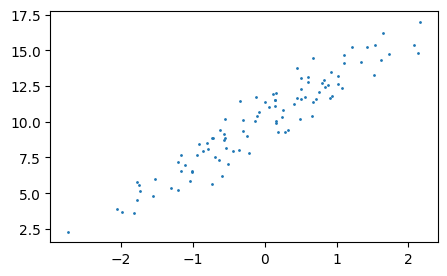

In [16]:
m = 100
X = np.random.randn(m,1)
print(X.shape)
y = 3*X + np.random.randn(m,1) + 10

fig, ax = plt.subplots(1, figsize=(5,3))
plt_obj = plt.scatter(X, y, s=1)
plt.show()

# Batch Gradient Descent

In [4]:
eta = 0.1
epsilon = 0.001
theta = np.random.randn(2,1)  # column vector
X_bias = np.c_[np.ones(m), X]  # first element in the intercept (equivalent to c_ equivalent to np.stack across 2nd axis)

norm = np.inf
norms = np.array([])
models = np.array([theta])

epoch = 0
while norm > eta:
    # vectorized version of gradient calculation
    gradient =  (2/m)*(X_bias.T).dot(X_bias.dot(theta)-y)  
    
    # compute gradient's norm
    norm = np.linalg.norm(gradient)
    norms = np.append(norms, [norm], axis=0)
    
    # update parameters
    theta = theta - eta*gradient
    models = np.append(models, [theta], axis=0)
    epoch += 1
print("Epochs", epoch)


Epochs 26


Above ws used the vectorized form of gradient calculation

$\nabla_{\theta}MSE(\theta = \begin{bmatrix} \frac{\partial}{\partial \theta_0}MSE(\theta) \\ \frac{\partial}{\partial \theta_1}MSE(\theta) \\ \frac{\partial}{\partial \theta_2}MSE(\theta) \\ ... \\ \frac{\partial}{\partial \theta_i}MSE(\theta) \\ ... \\ \frac{\partial}{\partial \theta_n}MSE(\theta) \end{bmatrix} = \frac{2}{m}X^T(X\theta-y)$ 

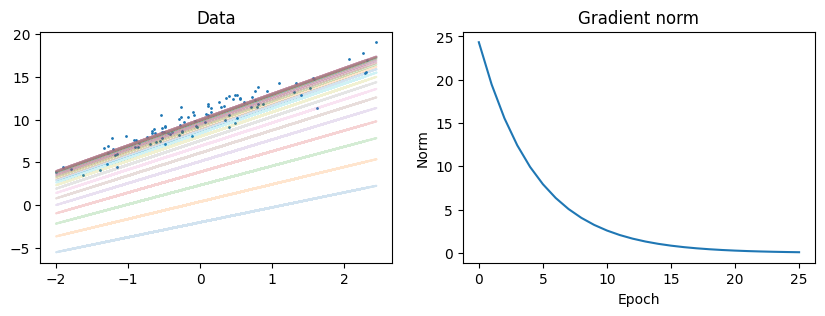

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
plt_obj = ax[0].scatter(X, y, s=1)
for model in models:
    y_pred = model[1]*X + model[0]
    ax[0].plot(X, y_pred, label=f"{model[1]}x + {model[0]}", alpha=0.2)
ax[1].plot(norms)
ax[0].set_title("Data")
ax[1].set_title("Gradient norm")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Norm")
plt.show()

## Predict

In [6]:
X_new = np.random.randn(100, 1)


X_model = models[-1][1][0]
b_model = models[-1][0][0]
y_predict = X_model*X_new + b_model
y_true = 3*X_new + np.random.randn(100,1) + 10


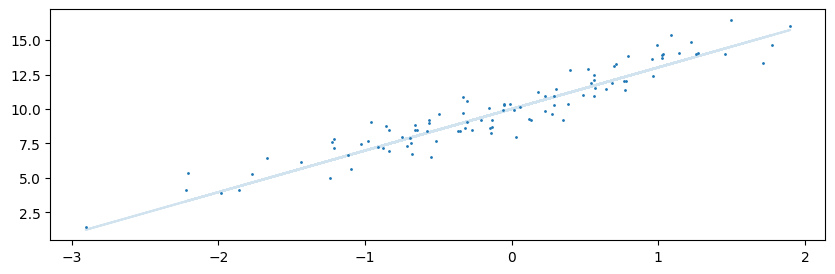

In [7]:
fig, ax = plt.subplots(1, figsize=(10,3))
plt_obj = ax.scatter(X_new, y_true, s=1)
ax.plot(X_new, y_predict, label=f"{model[1]}x + {model[0]}", alpha=0.2)
plt.show()

## Test Generalization

In [8]:
m = 100
X = np.random.randn(m,1)
print(X.shape)
y = 3*X + np.random.randn(m,1) + 10

(100, 1)


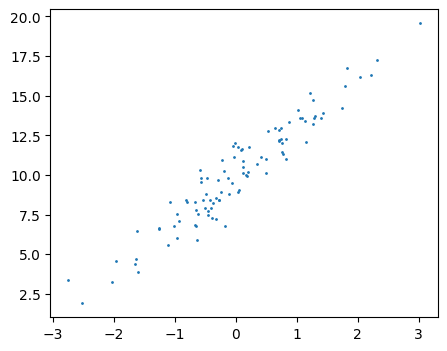

In [9]:
fig, ax = plt.subplots(1, figsize=(5,4))
plt_obj = plt.scatter(X, y, s=1)
plt.show()

###  Train

In [10]:
eta = 0.1
epsilon = 0.0001

batch_gd = BatchGradientDescent(eta=eta, epsilon=epsilon, mult_method="python-mult")
batch_gd.train(X, y)

Checking shape ...
X_bias shape  (100, 2)
y shape  (100, 1)
theta shape  (2, 1)


In [11]:
batch_gd.best_fit

array([[9.96071112],
       [3.02139677]])

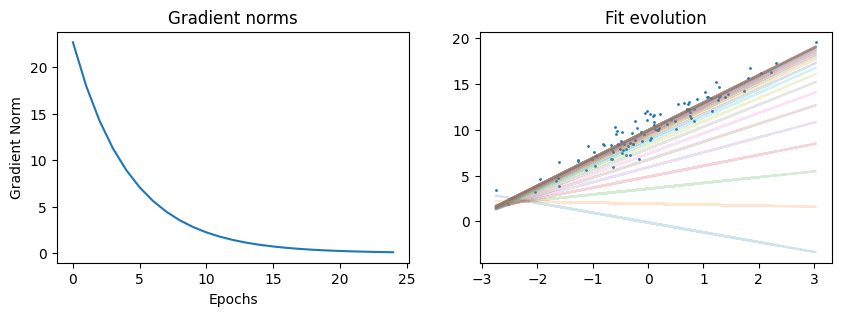

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
batch_gd.plot_norm(ax=ax[0])
batch_gd.plot_fit(X, y, ax=ax[1])
plt.show()

In [13]:
batch_gd.plot_fit(X, y, ax=ax[1])

In [14]:
X_new = np.random.randn(m,1)
y_true = 3*X_new + np.random.randn(m,1) + 10
y_predict = batch_gd.best_fit[1]*X_new + batch_gd.best_fit[0]

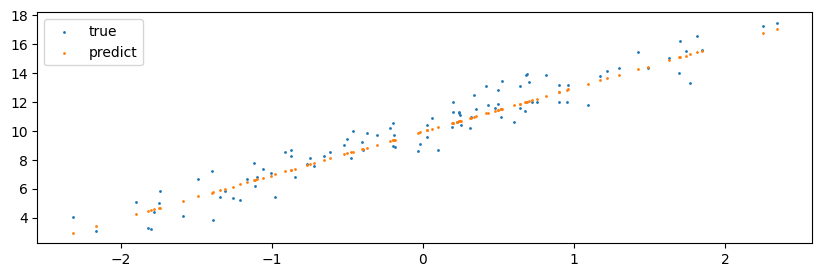

In [15]:
from time import sleep
fig, ax = plt.subplots(1, figsize=(10,3))
plt_obj = ax.scatter(X_new, y_true, s=1, label="true")
plt_obj = ax.scatter(X_new, y_predict, s=1, label="predict")
plt.legend()
plt.show()